In [1]:
# importing the packages that will be needed
%matplotlib inline

import pandas as pd
import numpy as np
 
from sklearn import datasets
from sklearn import cluster
 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # required for 3D projection to work

In [2]:
from sklearn.datasets import load_iris
sk_iris = load_iris() #load the dataset

#check if it's correctly imported
print(sk_iris.keys()) #it is supposed to be a dictionary, let's see the keys
print('\n')
print(sk_iris.data.shape) #1 column is missing... becuase it's the target!
print('\n')
print(sk_iris.feature_names) #name of the features
print('\n')
print(sk_iris.DESCR) #description of the dataset

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


(150, 4)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4

In [3]:
#read into panda and explore the dataset

#"dropping" the species
iris = pd.DataFrame(data= sk_iris['data'], columns= sk_iris['feature_names'])

print('HEAD:')
print(iris.head()) #print the head
print('\n')
print('TAIL:')
print(iris.tail()) #to check out last 10 row of the data set

HEAD:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


TAIL:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


In [4]:
#k-means estimator
from sklearn.cluster import KMeans

#fit
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris)
print("LABELS: " + str(kmeans.labels_))
print("\n")
print("CENTERS OF THE CLUSTERS: " + str(kmeans.cluster_centers_))

#concatenate
iris["label"] = kmeans.labels_

LABELS: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


CENTERS OF THE CLUSTERS: [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 0, 'petal length (cm)')

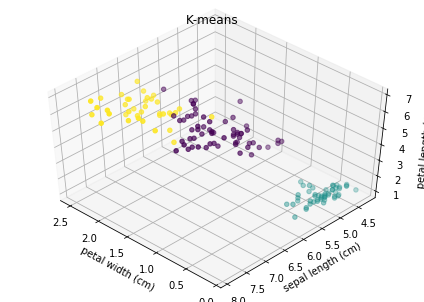

In [5]:
#3d scatter plot
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(iris["petal width (cm)"], iris["sepal length (cm)"], iris["petal length (cm)"], c=iris["label"])
ax.set_title("K-means")
ax.set_xlabel("petal width (cm)")
ax.set_ylabel("sepal length (cm)")
ax.set_zlabel("petal length (cm)")

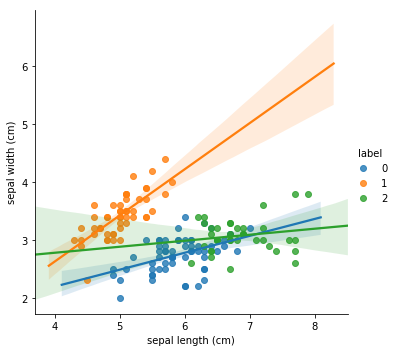

In [6]:
#“sepal length vs. sepal width” plot

iris_plot = iris[["sepal length (cm)","sepal width (cm)","label"]]
g = sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", hue="label", data=iris_plot)

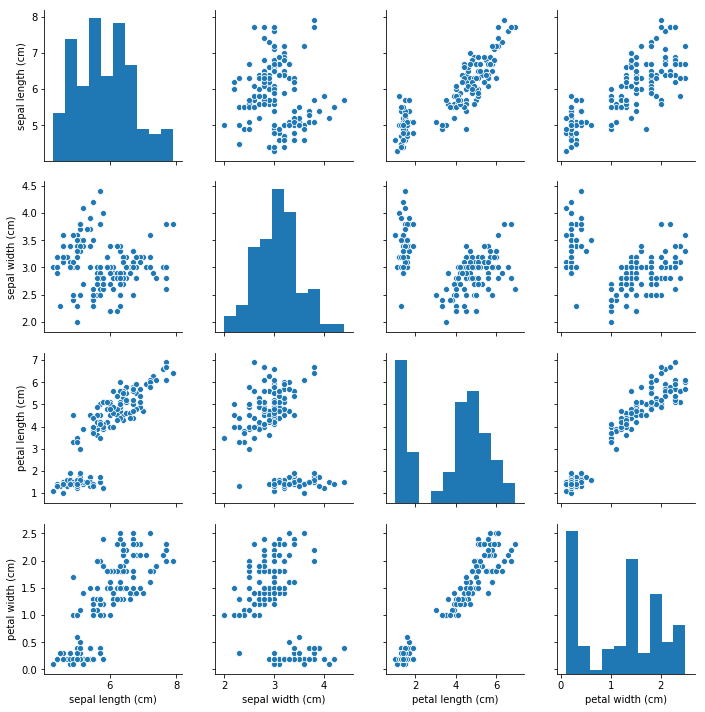

In [7]:
#pair plot

iris = iris.drop(['label'], axis = 1)
g = sns.pairplot(iris)